# **EPOCH 1st Datathon**
**Project Title:** 영화 제작자를 위한 예산 편성 시스템 구현 \
**Team:** 티모 (Team 5) \
**Members:** 1기 구재영, 2기 신성현

## **1. 전처리**

**파일 불러오기**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from os import link
credits=pd.read_csv("/content/drive/MyDrive/EPOCH Datathon Team 5/data/credits.csv")
keywords=pd.read_csv("/content/drive/MyDrive/EPOCH Datathon Team 5/data/keywords.csv")
links=pd.read_csv("/content/drive/MyDrive/EPOCH Datathon Team 5/data/links.csv")
movies_df=pd.read_csv("/content/drive/MyDrive/EPOCH Datathon Team 5/data/movies_metadata.csv")
ratings=pd.read_csv("/content/drive/MyDrive/EPOCH Datathon Team 5/data/ratings.csv")

<ipython-input-3-f137551238f3>:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df=pd.read_csv("/content/drive/MyDrive/EPOCH Datathon Team 5/data/movies_metadata.csv")


### **1.1. credits:** 영화 제작에 참여한 모든 사람들의 목록
**결측치는 없으나 `cast`와 `crew`가 0명인 영화들이 있어서 삭제**
  - cast: 영화 출연진으로 cast_id, character, credit_id, gender, id, name, order, profile_path가 각각에 대해 딕셔너리로 저장됨 **(리스트 형태로 변환)**
  - crew: 영화 제작진으로 credit_id, department, production, gender, id, job, name, profile_path가 각각에 대해 딕셔너리로 저장됨 **(리스트 형태로 변환)**
  - id: 각 영화의 아이디로 고유식별자

In [ ]:
# 리스트 형태로 변환
import ast
def parse_json_column(column):
    return column.apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and isinstance(x, str) else [])

In [ ]:
credits['cast'] = parse_json_column(credits['cast'])
credits['crew'] = parse_json_column(credits['crew'])

In [ ]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


→ 결측치가 없음을 확인

In [ ]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [ ]:
# cast와 crew가 0명인 영화는 행 자체를 삭제
credits = credits[(credits['cast'].str.len() != 0) & (credits['crew'].str.len() != 0)]

In [ ]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42708 entries, 0 to 45474
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    42708 non-null  object
 1   crew    42708 non-null  object
 2   id      42708 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [ ]:
# 전체 데이터에 합칠 데이터

filtered_credits=credits.copy()

In [ ]:
filtered_credits['num_cast'] = filtered_credits['cast'].apply(lambda x: len(x) if isinstance(x, list) else 0)
filtered_credits['num_crew'] = filtered_credits['crew'].apply(lambda x: len(x) if isinstance(x, list) else 0)

### **1.2. keywords:** 영화에 관련된 키워드 정보
**결측값은 없으나 keywords가 빈 데이터가 14795개 가량으로, 그 수가 많아서 우선 보류**
  - id: 각 영화의 아이디로 고유식별자
  - keywords: id(키워드의 아이디이다), name 이 각각 딕셔너리 형태로 저장됨**(리스트 형태로 변환)**

In [ ]:
def parse_json_column(column):
    return column.apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and isinstance(x, str) else [])

keywords['keywords'] = parse_json_column(keywords['keywords'])

In [ ]:
keywords['keywords'][0]

[{'id': 931, 'name': 'jealousy'},
 {'id': 4290, 'name': 'toy'},
 {'id': 5202, 'name': 'boy'},
 {'id': 6054, 'name': 'friendship'},
 {'id': 9713, 'name': 'friends'},
 {'id': 9823, 'name': 'rivalry'},
 {'id': 165503, 'name': 'boy next door'},
 {'id': 170722, 'name': 'new toy'},
 {'id': 187065, 'name': 'toy comes to life'}]

In [ ]:
# 키워드가 없는 행들
len(keywords[keywords['keywords'].str.len() == 0])

14795

In [ ]:
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [ ]:
# 전체 데이터에 합칠 데이터

filtered_keywords=keywords.copy()

### **1.3. movies_df:** 다양한 영화 정보 (45466) → (Index: 45362 entries, 0 to 45465)
  -  adult: 영화가 성인용 콘텐츠인지 여부 **(결측치 없음, 수치형 계산을 위해 true:1, false: 0으로 변환)**
  - belongs_to_collection: 영화가 시리즈나 컬렉션에 속하는지 여부 **(안에 값이 있으면 1로, 결측값이면 0으로 변환)**
  - budget: 영화의 제작 예산 **(결측치 없음, 수치형으로 변환)**
  - genres: 영화 장르 목록 **(결측치 없음, 리스트 형태로 변환)**
  - homepage: 영화의 공식 홈페이지 URL **(필요없어보여서 컬럼 삭제)**
  - id: 영화의 고유 ID **(결측치 없음)**
  - imdb_id: IMDb에서의 고유 식별자(ID) **(중요한 정보로 결측값이 있는 행들 삭제)**
  - original_language: 영화의 원래 제작 언어 **(결측치는 우선 'Unknown'으로 대체)**
  - original_title: 영화의 원제 **(결측치 없음)**
  - overview: 영화의 줄거리 요약 **(결측치 'Unknown'으로 대체)**
  - popularity: 영화의 인기 지수 **(숫자 타임으로 변환하고, 중요한 요소라서 결측 행 삭제)**
  - poster_path: 영화 포스터 이미지 경로 **(필요없어보여서 컬럼 삭제)**
  - production_companies: 제작 회사 목록 **(결측치는 빈 리스트로 둔다, 리스트 형식 변환)**
  - production_countries: 제작 국가 목록 **(결측치는 빈 리스트로 둔다, 리스트 형식 변환)**
  - release_date: 영화의 개봉일 **(일단은 결측값 그대로 둠, 날짜 형식으로 변환)**
  - revenue: 영화의 수익 **(중요한 요소인 것 같아서 결측값 삭제)**
  - runtime: 영화의 상영 시간(분) **(결측값 수치형이므로 nan그대로 둔다 대체)**
  - spoken_languages: 영화에서 사용된 언어 목록 **(결측치는 빈 리스트로 둔다, 리스트 형식 변환)**
  - status: 영화의 현재 상태(개봉, 미개봉 등) **(결측치 제거)**
  - tagline: 영화의 태그라인(주제나 캐치프레이즈). **(결측치 Unknown)**
  - title: 영화의 제목으로 원제의 영문 변환 **(결측치 제거)**
  - video: 영화의 비디오 콘텐츠 여부 ("True" 또는 "False"). **(결측치 unknown)**
  - vote_average: 영화의 평균 평점 **(중요한 값으로 결측치 제거)**
  - vote_count: 영화에 대한 투표 수 **(중요한 값으로 결측치 제거)**

➕num_production_companies<br>
➕num_production_countries<br>
➕num_spoken_languages

In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

#### **budget**

In [ ]:
len(movies_df[movies_df['budget'] == '0']), len(movies_df[movies_df['budget'] != '0'])

(36573, 8893)

→ `budget` 컬럼의 경우, 결측치가 0으로 작성된 경우가 다수 존재

In [ ]:
# 문자열이기 때문데 수치형으로 변환
movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors='coerce')

# 데이터 변형이 필요하므로 movies_df 복제하여 진행
movies = movies_df.copy()

하지만 본 프로젝트에서 `budget` 컬럼이 가장 핵심적인 변수(종속변수)인 만큼, 외부 데이터와 병합함으로써 최대한 결측치를 채워보는 것으로 결정
- `https://www.the-numbers.com/movie/budgets/all`에서 영화 제목, 예산 데이터를 제공하고 있으므로, 크롤링을 통해 데이터를 가져와 병합

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Base URL
base_url = 'https://www.the-numbers.com/movie/budgets/all/{}'  # {} 부분은 페이지 번호

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

# 데이터 저장용 리스트 생성
all_movies_data = []

# 크롤링 코드
for page in range(1, 1001):
    url = base_url.format(page)
    response = requests.get(url, headers=headers)

    soup = BeautifulSoup(response.text, 'html.parser')

    # 예산 데이터를 포함하는 테이블 탐색
    table = soup.find('table')

    # table 존재 시 콘텐츠 불러오기
    if table:
        # header row 제외하고 불러오기
        for row in table.find_all('tr')[1:]:
            columns = row.find_all('td')
            if len(columns) >= 5:
                # 관련 데이터 추출 (Rank, Release Date, Movie Title, Production Budget, Worldwide Gross)
                rank = columns[0].text.strip()
                release_date = columns[1].text.strip()
                title = columns[2].text.strip()
                production_budget = columns[3].text.strip()
                worldwide_gross = columns[4].text.strip()

                all_movies_data.append([rank, release_date, title, production_budget, worldwide_gross])
    else:
        print(f"Table not found on page {page}, stopping pagination.")
        break  # table이 없을 시에 loop 중단

# 데이터를 DataFrame 형태로 변환
budget = pd.DataFrame(all_movies_data, columns=['Rank', 'Release Date', 'Title', 'Production Budget', 'Worldwide Gross'])

print(f"Scraped {len(budget)} rows")
budget.head()

In [ ]:
# 크롤링을 통해 수집한 데이터를 csv 파일로 저장
budget.to_csv("/content/drive/My Drive/EPOCH Datathon Team 5/data/movie_budgets.csv", index=False)

총 10,000개의 데이터를 수집하였으므로, 기존의 `movies_df`와 합치는 작업 진행

In [ ]:
budget = pd.read_csv("/content/drive/MyDrive/EPOCH Datathon Team 5/data/movie_budgets.csv")
budget

,Rank,Release Date,Title,Production Budget,Worldwide Gross
0,1,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$533,200,000","$936,662,225"
1,2,"Dec 9, 2022",Avatar: The Way of Water,"$460,000,000","$684,075,767"
2,3,"Jun 28, 2023",Indiana Jones and the Dial of Destiny,"$402,300,000","$174,480,468"
3,4,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000"
4,5,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802"
...,...,...,...,...,...
99995,996,"Sep 14, 2017",American Assassin,"$63,000,000","$36,249,674"
99996,997,"Jun 24, 1994",Wyatt Earp,"$63,000,000","$25,052,000"
99997,998,"Aug 3, 1994",Clear and Present Danger,"$62,000,000","$122,012,656"
99998,999,"Apr 21, 2000",U-571,"$62,000,000","$77,086,030"


In [ ]:
# 'Production Budget' 컬럼을 수치형으로 변환하기
budget['Production Budget'] = budget['Production Budget'].replace({'\$': '', ',': ''}, regex=True).astype(float)
budget[['Title', 'Production Budget']].head(7)

,Title,Production Budget
0,Star Wars Ep. VII: The Force Awakens,533200000.0
1,Avatar: The Way of Water,460000000.0
2,Indiana Jones and the Dial of Destiny,402300000.0
3,Avengers: Endgame,400000000.0
4,Pirates of the Caribbean: On Stranger Tides,379000000.0
5,Avengers: Age of Ultron,365000000.0
6,Fast X,340000000.0


In [ ]:
# 데이터프레임 병합 전, movies 내의 budget 컬럼 데이터도 전처리 추가 진행

movies['budget'].dropna().head(5)

,budget
0,30000000.0
1,65000000.0
2,0.0
3,16000000.0
4,0.0


In [ ]:
# 두 데이터프레임에서 중복 확인
print("movies에서 중복된 제목 수:", movies['title'].duplicated().sum())
print("budget에서 중복된 제목 수:", budget['Title'].duplicated().sum())

# 필요한 경우 budget에서 중복된 행 제거
budget_unique = budget.drop_duplicates(subset='Title')

# 중복을 방지하기 위해 movies & budget_unique를 병합
movies = movies.merge(budget_unique[['Title', 'Production Budget']],
                      left_on='title', right_on='Title', how='left')

# movies의 'budget' 컬럼에서 결측치나 0인 값을 budget_unique의 'Production Budget' 값으로 채우기
movies['budget'] = movies.apply(
    lambda row: row['Production Budget'] if pd.isna(row['budget']) or row['budget'] == 0 else row['budget'],
    axis=1
)

# 병합에 사용한 'Production Budget'과 'Title' 컬럼 삭제
movies = movies.drop(columns=['Production Budget', 'Title'])

# 결과로 업데이트된 DataFrame 정보 출력
movies.info()

movies에서 중복된 제목 수: 3188
budget에서 중복된 제목 수: 99007
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 9086 non-null   float64
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  relea

`budget` 컬럼의 non-null 값이 8893개에서 9086개로 증가

In [ ]:
# budget이 핵심 컬럼이기 때문에, 결측치를 최대한 채우고도 채워지지 않은 행은 삭제 후 분석을 진행하기로 결정

filtered_movies_df = movies.dropna(subset=['budget'])

#### **adult**

In [ ]:
# 'adult' 열을 'True'는 1, 'False'는 0으로 변환
filtered_movies_df['adult'] = filtered_movies_df['adult'].apply(lambda x: 1 if x == 'True' else 0)

<ipython-input-25-437a2f93a166>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_movies_df['adult'] = filtered_movies_df['adult'].apply(lambda x: 1 if x == 'True' else 0)


#### **belongs_to_collection**

In [ ]:
# belongs_to_collection 값이 있으면 1, 없으면 0으로 변환
filtered_movies_df['belongs_to_collection'] = filtered_movies_df['belongs_to_collection'].apply(lambda x: 1 if pd.notnull(x) else 0)

<ipython-input-26-65d0619fb097>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_movies_df['belongs_to_collection'] = filtered_movies_df['belongs_to_collection'].apply(lambda x: 1 if pd.notnull(x) else 0)


#### **genres**

In [ ]:
# 장르 어떤 것들이 있는지 확인

def extract_genres(genres_str):
    genres_list = ast.literal_eval(genres_str)
    return [genre['name'] for genre in genres_list]

# 각 영화의 장르 리스트로 변환
filtered_movies_df['genres_list'] = filtered_movies_df['genres'].apply(extract_genres)

# 장르의 고윳값 확인
unique_genres = set([genre for sublist in filtered_movies_df['genres_list'] for genre in sublist])
unique_genres

<ipython-input-27-a1966481f96c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_movies_df['genres_list'] = filtered_movies_df['genres'].apply(extract_genres)


{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [ ]:
# 각 영화의 장르 리스트 추출 및 더미 변수 생성
genre_dummies = filtered_movies_df['genres_list'].str.join('|').str.get_dummies()
genre_dummies

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
5,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45408,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45409,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
45412,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
45422,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
filtered_movies_df = pd.concat([filtered_movies_df, genre_dummies], axis=1)

#### **production_companies** & **production_countries**

In [ ]:
# production_companies
# 리스트 형태로 변환 (결측치는 빈 리스트) + production_companies가 몇 개 있는지 수치 계산한 num_production_companies 컬럼 생성
filtered_movies_df['production_companies'] = parse_json_column(filtered_movies_df['production_companies'])
filtered_movies_df['num_production_companies'] = filtered_movies_df['production_companies'].apply(lambda x: len(x) if isinstance(x, list) else 0)

In [ ]:
# production_countries
# 리스트 형태로 변환 (결측치는 빈 리스트) + production_countries가 몇 개 있는지 수치 계산한 num_production_countries 컬럼 생성
filtered_movies_df['production_countries'] = parse_json_column(filtered_movies_df['production_countries'])
filtered_movies_df['num_production_countries'] = filtered_movies_df['production_countries'].apply(lambda x: len(x) if isinstance(x, list) else 0)

#### **release_date**

In [ ]:
# datetime 형태로 변환
filtered_movies_df['release_date'] = pd.to_datetime(filtered_movies_df['release_date'], errors='coerce')

- `release_date`는 연도/월 데이터를 추출해 `budget`을 물가 데이터로 가중치를 부여하는 데 활용할 예정
- 물가 데이터 수집을 위해 우선 `release_date` 순으로 데이터를 정렬

In [ ]:
# release_date 기준으로 정렬 (null 값은 가장 아래로 위치)
filtered_movies_df = filtered_movies_df.sort_values(by='release_date', ascending=True, na_position='last')
filtered_movies_df['release_date'].head()

,release_date
41074,1899-10-01
9952,1902-09-01
39530,1903-10-17
11423,1903-12-01
28585,1904-10-01


In [ ]:
filtered_movies_df['release_date'].dropna().tail(1)

,release_date
38885,2018-12-31


1899년 10월, 1902년 9월 데이터부터 2018년 12월 데이터까지 존재함을 확인

#### **tagline**

In [ ]:
filtered_movies_df['tagline'].dropna().head(10)

,tagline
9952,A voyage to narrative cinema
6913,The fiery cross of the Ku Klux Klan.
33057,A stirring love tale of Old Spain. Based on th...
7090,The Cruel Hand of Intolerance
13003,The First Submarine Photoplay Ever Filmed
6835,You must become Caligari.
3192,6 reels of Joy.
10868,A story of life and love in the actual Arctic.
7149,"""Happiness Must Be Earned"""
3507,The World's Greatest Laughing Picture!


In [ ]:
# 영화의 주제와 동떨어진 경우가 많아 삭제
filtered_movies_df = filtered_movies_df.drop(columns=['tagline'])

#### **id**

In [ ]:
# numeric으로 변환

filtered_movies_df['id'] = pd.to_numeric(filtered_movies_df['id'], errors='coerce')

#### **video**

간략하게 데이터 형태 확인

In [ ]:
filtered_movies_df['video'].dropna().head(3)

,video
41074,False
9952,False
39530,False


In [ ]:
# True이면 1, False이면 0으로 변환
filtered_movies_df['video'] = filtered_movies_df['video'].apply(lambda x: 1 if x == True else 0)

#### **spoken_languages**

In [ ]:
# 리스트 형태로 변환 (결측치는 빈 리스트로 두기)
filtered_movies_df['spoken_languages'] = parse_json_column(filtered_movies_df['spoken_languages'])

In [ ]:
# num_spoken_languages라는 열을 만들어 사용된 언어 개수를 저장
filtered_movies_df['num_spoken_languages'] = filtered_movies_df['spoken_languages'].apply(lambda x: len(x) if isinstance(x, list) else 0)

#### **삭제할 컬럼 확인**

In [ ]:
filtered_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9086 entries, 41074 to 24738
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   adult                     9086 non-null   int64         
 1   belongs_to_collection     9086 non-null   int64         
 2   budget                    9086 non-null   float64       
 3   genres                    9086 non-null   object        
 4   homepage                  2778 non-null   object        
 5   id                        9086 non-null   int64         
 6   imdb_id                   9084 non-null   object        
 7   original_language         9086 non-null   object        
 8   original_title            9086 non-null   object        
 9   overview                  9037 non-null   object        
 10  popularity                9086 non-null   object        
 11  poster_path               9079 non-null   object        
 12  production_companies

In [ ]:
filtered_movies_df = filtered_movies_df.drop(columns=['homepage','original_language','poster_path'])

### **1.5. 데이터 병합**

In [ ]:
# filtered_credits에서 id가 중복된 행을 제거 (첫 번째 행만 유지)
filtered_credits = filtered_credits.drop_duplicates(subset=['id'])

# filtered_movies_df에서도 id가 중복된 행을 제거
filtered_movies_df = filtered_movies_df.drop_duplicates(subset=['id'])

# filtered_keywords_df에서도 id가 중복된 행을 제거
filtered_keywords = filtered_keywords.drop_duplicates(subset=['id'])

In [ ]:
movie = pd.DataFrame()

In [ ]:
# 먼저 filtered_credits와 filtered_movies_df를 id를 기준으로 병합
movie = pd.merge(filtered_credits, filtered_movies_df, on='id', how='inner')

# filtered_keywords를 병합
movie = pd.merge(movie, filtered_keywords, on='id', how='inner')
print(movie.shape)

(8980, 50)


In [ ]:
movie['adjusted']

,cast,crew,id,num_cast,num_crew,adult,belongs_to_collection,budget,genres,imdb_id,...,Science Fiction,TV Movie,Thriller,War,Western,num_production_companies,num_production_countries,num_spoken_languages,adjusted_budget,keywords
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,13,106,0,1,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",tt0114709,...,0,0,0,0,0,1,1,1,239425.379090,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,26,16,0,0,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",tt0113497,...,0,0,0,0,0,3,1,2,517104.216388,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,"[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,10,10,0,0,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0114885,...,0,0,0,0,0,1,1,1,127287.191726,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
3,"[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[{'credit_id': '52fe4292c3a36847f802916d', 'de...",949,65,71,0,0,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",tt0113277,...,0,0,1,0,0,3,1,2,477326.968974,"[{'id': 642, 'name': 'robbery'}, {'id': 703, '..."
4,"[{'cast_id': 1, 'character': 'Linus Larrabee',...","[{'credit_id': '52fe44959251416c75039da9', 'de...",11860,57,53,0,0,58000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",tt0114319,...,0,0,0,0,0,7,2,2,461416.070008,"[{'id': 90, 'name': 'paris'}, {'id': 380, 'nam..."


In [ ]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8980 entries, 0 to 8979
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cast                      8980 non-null   object 
 1   crew                      8980 non-null   object 
 2   id                        8980 non-null   int64  
 3   num_cast                  8980 non-null   int64  
 4   num_crew                  8980 non-null   int64  
 5   adult                     8980 non-null   int64  
 6   belongs_to_collection     8980 non-null   int64  
 7   budget                    8980 non-null   float64
 8   genres                    8980 non-null   object 
 9   imdb_id                   8979 non-null   object 
 10  original_title            8980 non-null   object 
 11  overview                  8939 non-null   object 
 12  popularity                8980 non-null   object 
 13  production_companies      8980 non-null   object 
 14  producti

#### **결측치** 최종 처리

In [ ]:
movie['overview'] = movie['overview'].fillna('Unknown')

In [ ]:
movie = movie.dropna(subset=['imdb_id'])

In [ ]:
movie = movie.dropna(subset=['runtime'])

In [ ]:
movie = movie.dropna(subset=['release_date'])

In [ ]:
movie = movie.drop(columns=['status'])

In [ ]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8970 entries, 0 to 8979
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cast                      8970 non-null   object 
 1   crew                      8970 non-null   object 
 2   id                        8970 non-null   int64  
 3   num_cast                  8970 non-null   int64  
 4   num_crew                  8970 non-null   int64  
 5   adult                     8970 non-null   int64  
 6   belongs_to_collection     8970 non-null   int64  
 7   budget                    8970 non-null   float64
 8   genres                    8970 non-null   object 
 9   imdb_id                   8970 non-null   object 
 10  original_title            8970 non-null   object 
 11  overview                  8970 non-null   object 
 12  popularity                8970 non-null   float64
 13  production_companies      8970 non-null   object 
 14  production_co

In [ ]:
# 전처리 진행 후 데이터프레임을 csv 파일로 저장
movie.to_csv("/content/drive/My Drive/EPOCH Datathon Team 5/data/DATA.csv", index=False)

NameError: name 'movie' is not defined

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **2. 기본 시각화**

### budget과 다른 변수들 사이의 상관관계 분석
1. **Revenue(수익)**가 높을수록 **budget(예산)**도 높아집니다.

상관계수: 0.74. 수익이 높은 영화는 대체로 더 많은 예산을 투자한 영화임을 보여줍니다.
2. **Vote_count(투표 수)**가 많을수록 **budget(예산)**이 높아집니다.

상관계수: 0.62. 많은 관객의 투표를 받은 영화일수록 더 큰 예산을 투자한 경향이 있습니다.
3. **Num_crew(스태프 수)**가 많을수록 **budget(예산)**이 높아집니다.

상관계수: 0.49. 영화 제작에 참여한 스태프 수가 많을수록 예산도 커지는 경향이 있습니다.
4. **Num_cast(출연 배우 수)**가 많을수록 **budget(예산)**이 높아집니다.

상관계수: 0.36. 출연 배우 수가 많은 영화는 예산이 더 많이 투입되는 경향을 보입니다.
5. **Popularity(인기도)**가 높을수록 **budget(예산)**이 높아집니다.

상관계수: 0.36. 인기 있는 영화일수록 더 많은 예산이 투입되는 경향이 있습니다.
6. **Belongs_to_collection(시리즈 여부)**가 있으면 **budget(예산)**이 높아지는 경향이 있습니다.

상관계수: 0.22. 영화가 시리즈에 속하면 예산이 더 클 가능성이 있습니다.
7. **Runtime(상영 시간)**이 길수록 **budget(예산)**이 다소 높아지는 경향이 있습니다.

상관계수: 0.22. 상영 시간이 긴 영화는 예산이 약간 더 많이 투자되는 경향이 있습니다.
8. **Adult(성인용 여부)**는 **budget(예산)**과 거의 상관이 없습니다.

상관계수: -0.01. 영화가 성인용인지 여부는 예산과 크게 관련이 없습니다.
9. **Video(비디오 콘텐츠 여부)**는 **budget(예산)**과 상관관계가 거의 없습니다.

상관계수: -0.01. 영화가 비디오 콘텐츠인지 여부도 예산과 관련이 거의 없습니다.

In [16]:
import pandas as pd
movie = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EPOCH Datathon Team 5/data/DATA.csv")

In [17]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8970 entries, 0 to 8969
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cast                      8970 non-null   object 
 1   crew                      8970 non-null   object 
 2   id                        8970 non-null   int64  
 3   num_cast                  8970 non-null   int64  
 4   num_crew                  8970 non-null   int64  
 5   adult                     8970 non-null   int64  
 6   belongs_to_collection     8970 non-null   int64  
 7   budget                    8970 non-null   float64
 8   genres                    8970 non-null   object 
 9   imdb_id                   8970 non-null   object 
 10  original_title            8970 non-null   object 
 11  overview                  8970 non-null   object 
 12  popularity                8970 non-null   float64
 13  production_companies      8970 non-null   object 
 14  producti

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

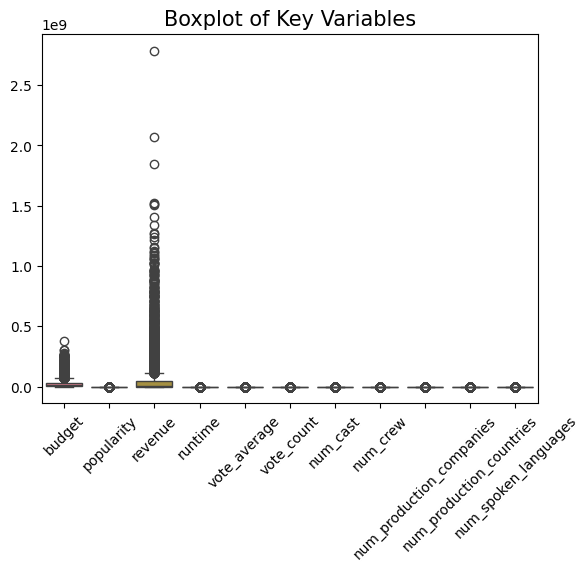

In [27]:
# 여러 변수에 대해 이상치를 확인하기 위해 boxplot 생성
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=movie[[ 'budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count',
                        'num_cast', 'num_crew', 'num_production_companies', 'num_production_countries', 'num_spoken_languages']])

plt.title('Boxplot of Key Variables', fontsize=15)
plt.xticks(rotation=45)
plt.show()

→ 일부 이상치를 많이 포함한 데이터가 있으므로, 이러한 경우에 적합한 `RobustScaler` 적용 결정 \
이때, `revenue` 변수의 경우 벌어들이는 수입이기 때문에 이상치를 굳이 별도로 처리하지 않아도 괜찮을 것이라고 판단

In [28]:
movie_0 = movie.copy()

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = RobustScaler()

# 수치형 변수 스케일링
scaled_features = scaler.fit_transform(movie_0[[ 'budget', 'revenue', 'popularity', 'num_cast', 'num_crew',
                                                'runtime', 'vote_average', 'vote_count']])

# 스케일링 결과를 데이터프레임에 다시 할당
movie_0[[ 'budget', 'revenue', 'popularity', 'num_cast', 'num_crew', 'runtime', 'vote_average', 'vote_count']] = scaled_features

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

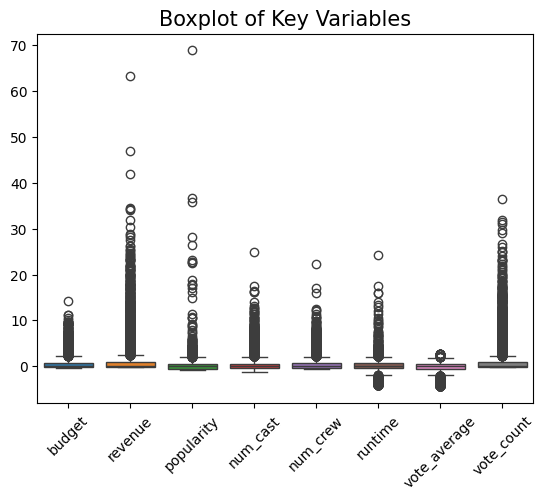

In [30]:
# boxplot 다시 확인
sns.boxplot(data=movie_0[[ 'budget', 'revenue', 'popularity', 'num_cast', 'num_crew',
                          'runtime', 'vote_average', 'vote_count']])

plt.title('Boxplot of Key Variables', fontsize=15)
plt.xticks(rotation=45)
plt.show()

In [22]:
columns=['budget','num_cast', 'num_crew', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count',
         'num_production_companies', 'num_production_countries', 'num_spoken_languages']
correlation_matrix = movie_0[columns].corr()

# 상관관계 행렬 출력
# print(correlation_matrix)

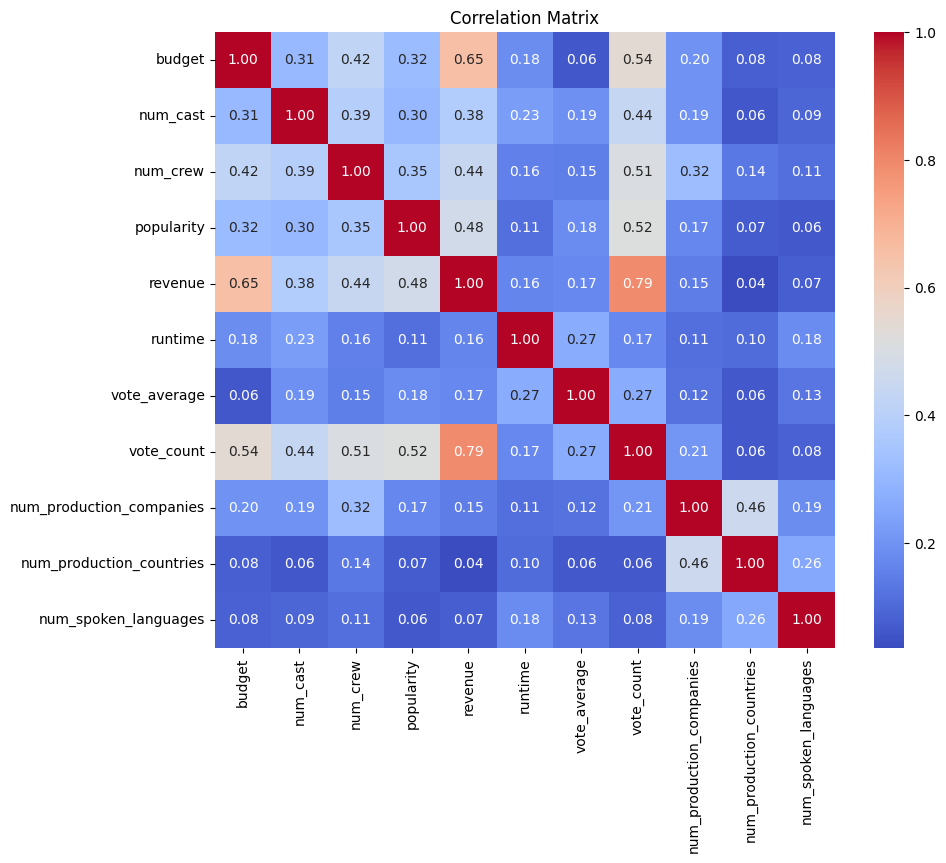

In [23]:
# 상관관계 히트맵 시각화
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## **3. NLP (자연어 처리)**

### **keyword**

In [ ]:
movie_0['keywords'][0]

"[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]"

In [ ]:
from gensim.models import Word2Vec

# 키워드에서 'name' 값만 추출하는 함수 정의
def extract_keywords(keyword_str):
    try:
        keywords = ast.literal_eval(keyword_str)
        return [kw['name'] for kw in keywords]  # 'name' 리스트로 추출
    except:
        return []

# 'keywords' 컬럼에서 'name' 값 추출
movie_0['keywords_list'] = movie_0['keywords'].apply(extract_keywords)

# Word2Vec 모델 학습
# 키워드 리스트로 구성된 데이터로 Word2Vec 학습 (vector size는 100으로 설정)
keywords_sentences = movie_0['keywords_list'].tolist()  # 모든 키워드를 하나의 리스트로
word2vec_model = Word2Vec(sentences=keywords_sentences, vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
import numpy as np

# 각 영화에 대해 키워드 벡터들의 평균 계산
def get_keyword_vector_avg(keywords, model):
    vectors = [model.wv[keyword] for keyword in keywords if keyword in model.wv]
    if len(vectors) == 0:  # 키워드가 없는 경우
        return np.zeros(100)  # 0 벡터 반환
    return np.mean(vectors, axis=0)  # 키워드 벡터들의 평균 계산

# 각 영화의 키워드 벡터 평균 계산하여 추가
movie_0['keywords_vector'] = movie_0['keywords_list'].apply(lambda x: get_keyword_vector_avg(x, word2vec_model))

# 결과 확인
movie_0[['keywords_list', 'keywords_vector']].head()

,keywords_list,keywords_vector
0,"[jealousy, toy, boy, friendship, friends, riva...","[-0.017092323, 0.033633944, 0.013980039, 0.006..."
1,"[board game, disappearance, based on children'...","[-0.0028664574, 0.0060139685, 0.004214896, -0...."
2,"[based on novel, interracial relationship, sin...","[-0.020102952, 0.03571011, 0.011205887, 0.0041..."
3,"[robbery, detective, bank, obsession, chase, s...","[-0.015773205, 0.029214911, 0.010458094, 0.004..."
4,"[paris, brother brother relationship, chauffeu...","[-0.007094478, 0.013832076, 0.006862562, -0.00..."


### **overview**

In [ ]:
movies_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EPOCH Datathon Team 5/data/DATA.csv')

In [ ]:
# 텍스트 데이터를 Sentence Transformer로 임베딩
model = SentenceTransformer('all-MiniLM-L12-v2')  # 사전 학습된 Sentence Transformer 모델
# overview(줄거리) 텍스트 데이터를 임베딩
movies_df['overview_embedding'] = movies_df['overview'].fillna('').apply(lambda x: model.encode(x))

In [ ]:
movies_df.head()

In [ ]:
movies_df.to_csv('/content/drive/MyDrive/Colab Notebooks/EPOCH Datathon Team 5/data/DATA_embedded.csv')

### **데이터 병합**

In [ ]:
embed = pd.read_csv("/content/drive/MyDrive/EPOCH Datathon Team 5/data/DATA_embedded.csv")

In [ ]:
DATA = embed.merge(movie_0[['imdb_id', 'keywords_vector', 'keywords_list']], on='imdb_id', how='left')

# 최종 결과 확인
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8970 entries, 0 to 8969
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                8970 non-null   int64  
 1   cast                      8970 non-null   object 
 2   crew                      8970 non-null   object 
 3   id                        8970 non-null   int64  
 4   num_cast                  8970 non-null   int64  
 5   num_crew                  8970 non-null   int64  
 6   adult                     8970 non-null   int64  
 7   belongs_to_collection     8970 non-null   int64  
 8   budget                    8970 non-null   float64
 9   genres                    8970 non-null   object 
 10  imdb_id                   8970 non-null   object 
 11  original_title            8970 non-null   object 
 12  overview                  8970 non-null   object 
 13  popularity                8970 non-null   float64
 14  producti

In [ ]:
# 최종 데이터를 csv 파일로 저장
DATA.to_csv("/content/drive/My Drive/EPOCH Datathon Team 5/data/semi_final.csv", index=False)

## **4. 모델 학습**

#### **추가 전처리**
- 우선 최종 데이터를 불러와, 필요한 변수를 추리는 과정을 진행

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_0 = pd.read_csv("/content/drive/MyDrive/EPOCH Datathon Team 5/data/semi_final.csv")
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8970 entries, 0 to 8969
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                8970 non-null   int64  
 1   cast                      8970 non-null   object 
 2   crew                      8970 non-null   object 
 3   id                        8970 non-null   int64  
 4   num_cast                  8970 non-null   int64  
 5   num_crew                  8970 non-null   int64  
 6   adult                     8970 non-null   int64  
 7   belongs_to_collection     8970 non-null   int64  
 8   budget                    8970 non-null   float64
 9   genres                    8970 non-null   object 
 10  imdb_id                   8970 non-null   object 
 11  original_title            8970 non-null   object 
 12  overview                  8970 non-null   object 
 13  popularity                8970 non-null   float64
 14  producti

In [ ]:
# 삭제할 컬럼 지정
df_1 = df_0.drop(columns=['Unnamed: 0', 'cast', 'crew', 'adult', 'genres', 'original_title', 'overview', 'production_companies',
                          'production_countries', 'release_date', 'spoken_languages', 'title', 'genres_list', 'keywords', 'keywords_list'])
df_1.head()

,id,num_cast,num_crew,belongs_to_collection,budget,imdb_id,popularity,revenue,runtime,video,...,TV Movie,Thriller,War,Western,num_production_companies,num_production_countries,num_spoken_languages,adjusted_budget,overview_embedding,keywords_vector
0,862,13,106,1,30000000.0,tt0114709,21.946943,373554033.0,81.0,0,...,0,0,0,0,1,1,1,239425.379090,[ 1.41594568e-02 7.43511394e-02 9.29841027e-...,[-1.70923229e-02 3.36339436e-02 1.39800394e-...
1,8844,26,16,0,65000000.0,tt0113497,17.015539,262797249.0,104.0,0,...,0,0,0,0,3,1,2,517104.216388,[ 7.52046183e-02 -4.39567119e-02 1.29458699e-...,[-2.8664574e-03 6.0139685e-03 4.2148959e-03 ...
2,31357,10,10,0,16000000.0,tt0114885,3.859495,81452156.0,127.0,0,...,0,0,0,0,1,1,1,127287.191726,[-6.79108351e-02 2.66372263e-02 1.97364371e-...,[-0.02010295 0.03571011 0.01120589 0.004107...
3,949,65,71,0,60000000.0,tt0113277,17.924927,187436818.0,170.0,0,...,0,1,0,0,3,1,2,477326.968974,[-5.55862598e-02 -1.12923831e-01 -4.65465561e-...,[-1.57732051e-02 2.92149112e-02 1.04580941e-...
4,11860,57,53,0,58000000.0,tt0114319,6.677277,0.0,127.0,0,...,0,0,0,0,7,2,2,461416.070008,[ 2.48620240e-03 3.65552641e-02 4.51741815e-...,[-0.00709448 0.01383208 0.00686256 -0.000170...


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8970 entries, 0 to 8969
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        8970 non-null   int64  
 1   num_cast                  8970 non-null   int64  
 2   num_crew                  8970 non-null   int64  
 3   belongs_to_collection     8970 non-null   int64  
 4   budget                    8970 non-null   float64
 5   imdb_id                   8970 non-null   object 
 6   popularity                8970 non-null   float64
 7   revenue                   8970 non-null   float64
 8   runtime                   8970 non-null   float64
 9   video                     8970 non-null   int64  
 10  vote_average              8970 non-null   float64
 11  vote_count                8970 non-null   float64
 12  Action                    8970 non-null   int64  
 13  Adventure                 8970 non-null   int64  
 14  Animatio

In [ ]:
def string_to_list(embedding_str):
    # 문자열에서 대괄호와 줄 바꿈 제거
    cleaned_str = embedding_str.replace('[', '').replace(']', '')

    # 공백을 기준으로 분리하고 실수형으로 변환
    embedding_list = [float(x) for x in cleaned_str.split()]

    return embedding_list

# 문자열을 리스트로 변환하여 적용
df_1['overview_embedding'] = df_1['overview_embedding'].apply(string_to_list)

In [ ]:
def string_to_list(embedding_str):
    # 문자열에서 대괄호와 줄 바꿈 및 기타 공백 제거
    cleaned_str = embedding_str.replace('[', '').replace(']', '').strip()

    # 공백을 기준으로 분리하고 실수형으로 변환
    embedding_list = [float(x) for x in cleaned_str.split()]

    return embedding_list

# 문자열을 리스트로 변환하여 적용
df_1['keywords_vector'] = df_1['keywords_vector'].apply(string_to_list)

### **XGBoost** & **LightGBM** & **CatBoost**

#### **genres** 컬럼 생성
- 장르별로 예산의 평균값을 구한 후, 그 값을 새로운 컬럼으로 추가하여 독립변수로 사용해 보자

In [ ]:
# Step 1: 장르별로 예산(budget)의 평균값 계산
genre_columns = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
                 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
                 'Thriller', 'War', 'Western']

# 장르별 평균 예산 계산
genre_avg_budget = {}
for genre in genre_columns:
    genre_avg_budget[genre] = df_1[df_1[genre] == 1]['budget'].mean()

# Step 2: 장르별 예산 평균치를 기반으로 새로운 genres 컬럼 생성
def calculate_genre_budget(row):
    genre_budgets = []
    for genre in genre_columns:
        if row[genre] == 1:
            genre_budgets.append(genre_avg_budget[genre])

    # 장르가 하나인 경우 해당 장르의 평균 예산 사용, 장르가 둘 이상인 경우 평균값 사용
    if len(genre_budgets) > 0:
        return sum(genre_budgets) / len(genre_budgets)
    else:
        return np.nan  # 해당하는 장르가 없는 경우 NaN으로 처리

# Apply the function to calculate the new 'genres' column
df_1['genres'] = df_1.apply(calculate_genre_budget, axis=1)

# 결과 확인
df_1[['genres']].head()

,genres
0,4.108544e+07
1,5.153027e+07
2,2.027765e+07
3,2.641857e+07
4,2.090760e+07


#### **스케일링 진행**

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = RobustScaler()

# 수치형 변수 스케일링
scaled_features = scaler.fit_transform(df_1[['revenue', 'popularity', 'num_cast', 'num_crew', 'runtime', 'vote_average', 'vote_count', 'genres']])

# 스케일링 결과를 데이터프레임에 다시 할당
df_2 = df_1.copy()
df_2[['revenue', 'popularity', 'num_cast', 'num_crew', 'runtime', 'vote_average', 'vote_count', 'genres']] = scaled_features
df_2.head()

,id,num_cast,num_crew,belongs_to_collection,budget,imdb_id,popularity,revenue,runtime,video,...,Thriller,War,Western,num_production_companies,num_production_countries,num_spoken_languages,adjusted_budget,overview_embedding,keywords_vector,genres
0,862,-0.166667,4.894737,1,30000000.0,tt0114709,1.989557,8.419237,-0.80,0,...,0,0,0,1,1,1,239425.379090,"[0.0141594568, 0.0743511394, 0.0929841027, -0....","[-0.0170923229, 0.0336339436, 0.0139800394, 0....",1.725821
1,8844,0.916667,0.157895,0,65000000.0,tt0113497,1.362002,5.902782,0.12,0,...,0,0,0,3,1,2,517104.216388,"[0.0752046183, -0.0439567119, 0.0129458699, -0...","[-0.0028664574, 0.0060139685, 0.0042148959, -0...",2.693603
2,31357,-0.416667,-0.157895,0,16000000.0,tt0114885,-0.312196,1.782523,1.04,0,...,0,0,0,1,1,1,127287.191726,"[-0.0679108351, 0.0266372263, 0.0197364371, -0...","[-0.02010295, 0.03571011, 0.01120589, 0.004107...",-0.202158
3,949,4.166667,3.052632,0,60000000.0,tt0113277,1.477728,4.190552,2.76,0,...,1,0,0,3,1,2,477326.968974,"[-0.0555862598, -0.112923831, -0.0465465561, -...","[-0.0157732051, 0.0292149112, 0.0104580941, 0....",0.366838
4,11860,3.500000,2.105263,0,58000000.0,tt0114319,0.046386,-0.068114,1.04,0,...,0,0,0,7,2,2,461416.070008,"[0.0024862024, 0.0365552641, 0.0451741815, -0....","[-0.00709448, 0.01383208, 0.00686256, -0.00017...",-0.143789


#### **모델 3가지 학습**

In [ ]:
!pip install catboost

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# 사용할 수치형 변수 선택
numeric_features = ['revenue', 'vote_count', 'num_crew', 'num_cast', 'popularity', 'runtime', 'belongs_to_collection', 'num_production_companies',
                    'genres']
X_numeric = df_2[numeric_features].values

# NLP 변수
X_text = np.vstack(df_2['overview_embedding'].values)

# 수치형 데이터와 텍스트 임베딩 결합
X = np.hstack((X_numeric, X_text))

# 예산(target)
y = df_2['budget']

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 1. XGBoost 모델
xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.06)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'XGBoost - MSE: {mse_xgb}, R²: {r2_xgb}')

# 2. LightGBM 모델
lgb_model = LGBMRegressor(n_estimators=300, learning_rate=0.06)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)
print(f'LightGBM - MSE: {mse_lgb}, R²: {r2_lgb}')

# 3. CatBoost 모델
cat_model = CatBoostRegressor(n_estimators=300, learning_rate=0.06, verbose=0)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)

mse_cat = mean_squared_error(y_test, y_pred_cat)
r2_cat = r2_score(y_test, y_pred_cat)
print(f'CatBoost - MSE: {mse_cat}, R²: {r2_cat}')

# 4. 앙상블 모델 (XGBoost, LightGBM, CatBoost의 예측 평균)
y_pred_ensemble = (y_pred_xgb + y_pred_lgb + y_pred_cat) / 3

mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)
print(f'Ensemble (XGB + LGB + CatBoost) - MSE: {mse_ensemble}, R²: {r2_ensemble}')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


XGBoost - MSE: 602194734728174.6, R²: 0.5544522519325561
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047360 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 99393
[LightGBM] [Info] Number of data points in the train set: 8073, number of used features: 393
[LightGBM] [Info] Start training from score 23793310.604608
LightGBM - MSE: 570851391928939.5, R²: 0.577642351406622
CatBoost - MSE: 563567438006110.4, R²: 0.5830315537363442
Ensemble (XGB + LGB + CatBoost) - MSE: 561262660574980.0, R²: 0.5847367967997867


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# 사용할 수치형 변수 선택
numeric_features = ['revenue', 'vote_count', 'num_crew', 'num_cast', 'popularity', 'runtime', 'belongs_to_collection', 'num_production_companies',
                    'genres', 'num_production_countries', 'num_spoken_languages', 'vote_average']
X_numeric = df_2[numeric_features].values

# NLP 변수
X_text = np.vstack(df_2['overview_embedding'].values)

# 수치형 데이터와 텍스트 임베딩 결합
X = np.hstack((X_numeric, X_text))

# 예산(target)
y = df_2['budget']

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 1. XGBoost 모델
xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.1)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'XGBoost - MSE: {mse_xgb}, R²: {r2_xgb}')

# 2. LightGBM 모델
lgb_model = LGBMRegressor(n_estimators=300, learning_rate=0.1)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)
print(f'LightGBM - MSE: {mse_lgb}, R²: {r2_lgb}')

# 3. CatBoost 모델
cat_model = CatBoostRegressor(n_estimators=300, learning_rate=0.1, verbose=0)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)

mse_cat = mean_squared_error(y_test, y_pred_cat)
r2_cat = r2_score(y_test, y_pred_cat)
print(f'CatBoost - MSE: {mse_cat}, R²: {r2_cat}')

# 4. 앙상블 모델 (XGBoost, LightGBM, CatBoost의 예측 평균)
y_pred_ensemble = (y_pred_xgb + y_pred_lgb + y_pred_cat) / 3

mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)
print(f'Ensemble (XGB + LGB + CatBoost) - MSE: {mse_ensemble}, R²: {r2_ensemble}')

XGBoost - MSE: 569491832042705.9, R²: 0.5786482533362489
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 99485
[LightGBM] [Info] Number of data points in the train set: 8073, number of used features: 396
[LightGBM] [Info] Start training from score 23793310.604608
LightGBM - MSE: 571746796189153.6, R²: 0.5769798657873673
CatBoost - MSE: 558381825379809.25, R²: 0.5868682495670401
Ensemble (XGB + LGB + CatBoost) - MSE: 541777829245506.06, R²: 0.5991531013930838


변수를 추가하면 위와 같이 성능 자체는 향상되는 것을 볼 수 있으나, \
사용자의 입력을 받아 시스템을 운영한다는 구조상, 입력해야 하는 변수의 수를 늘리는 것이 바람직하지 않다고 판단

## **5. 클러스터**

In [35]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EPOCH Datathon Team 5/data/semi_final.csv')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


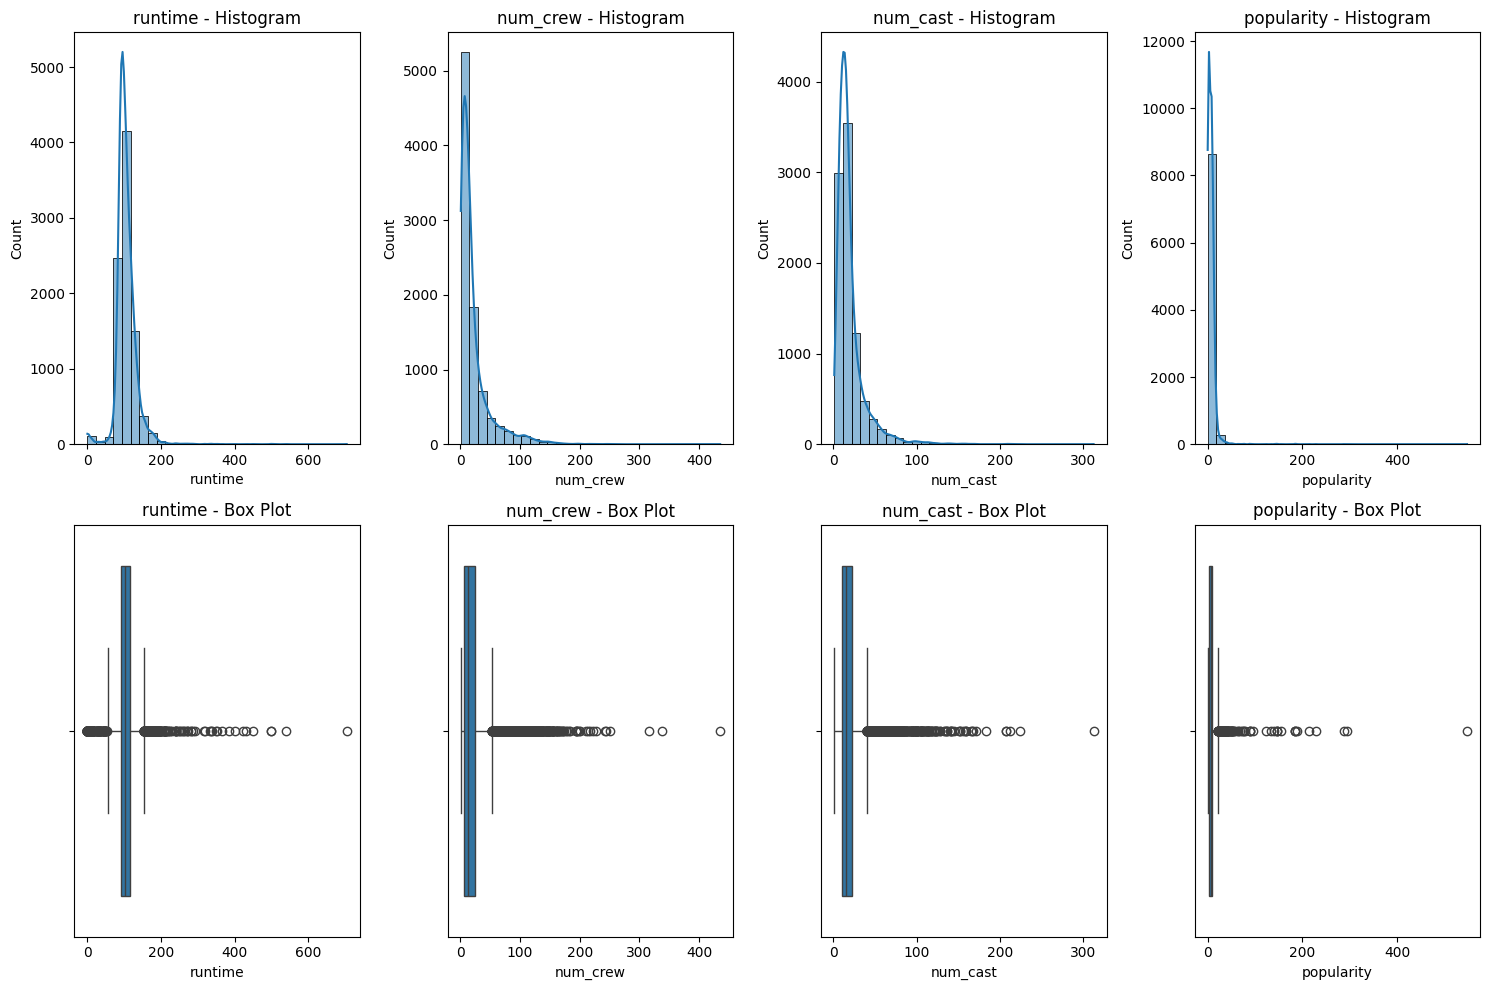

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히스토그램과 박스플롯을 동시에 그리는 함수
def plot_distribution(data, columns):
    plt.figure(figsize=(15, 10))

    for i, col in enumerate(columns):
        plt.subplot(2, len(columns), i + 1)
        sns.histplot(data[col], bins=30, kde=True)
        plt.title(f'{col} - Histogram')

        plt.subplot(2, len(columns), len(columns) + i + 1)
        sns.boxplot(x=data[col])
        plt.title(f'{col} - Box Plot')

    plt.tight_layout()
    plt.show()

# 분포 확인할 컬럼 리스트
columns_to_check = ['runtime', 'num_crew', 'num_cast', 'popularity']

# 분포 시각화
plot_distribution(df, columns_to_check)


In [36]:
from sklearn.preprocessing import StandardScaler

# 클러스터링에 사용할 컬럼 선택 (상영 시간, 크루 수, 배우 수, 인기도, 장르)
X = df[['runtime', 'num_crew', 'num_cast', 'popularity']]

# 데이터 스케일링
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

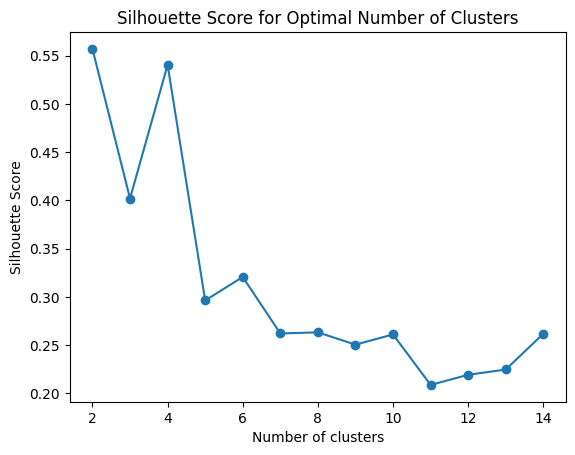

In [38]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# 여러 클러스터 수에 대해 실루엣 점수 계산
silhouette_scores = []
for i in range(2, 15):  # 2부터 10까지 클러스터 수 테스트
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# 실루엣 점수를 그래프로 그리기
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [40]:
from sklearn.cluster import KMeans
# K-Means 클러스터링
kmeans = KMeans(n_clusters=6, random_state=42)  # 클러스터 수는 6으로 설정 (원하는 만큼 조정 가능)
df['producer_type'] = kmeans.fit_predict(X_scaled)

# 각 클러스터의 센트로이드 출력 (제작자 유형의 특징 확인)
centroids = kmeans.cluster_centers_
print("Centroids:", centroids)

# 클러스터링 결과를 데이터프레임에 추가
print(df[['runtime', 'num_crew', 'num_cast']].head())

Centroids: [[-2.56329798e-01 -1.77411710e-01 -2.86872123e-01 -2.48331854e-01]
 [ 5.00789474e-01  4.64291898e+00  1.24067982e+00  1.06622764e+00]
 [ 2.80594985e-01  7.72585949e-01  1.00127497e+00  5.08581043e-01]
 [ 9.72348993e-01  1.69798658e+00  6.06124161e+00  9.24333476e-01]
 [ 1.14500000e+00  4.80263158e+00  4.53125000e+00  2.54830311e+01]
 [ 2.39432665e+00 -1.19137385e-02  6.86485196e-02 -1.31484806e-01]]
   runtime  num_crew  num_cast
0     81.0       106        13
1    104.0        16        26
2    127.0        10        10
3    170.0        71        65
4    127.0        53        57


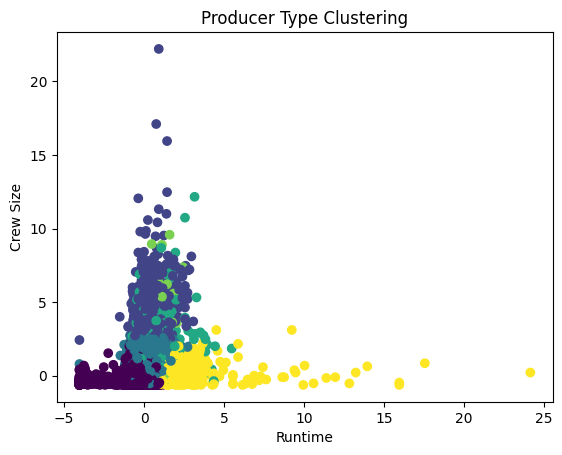

In [41]:
# 클러스터별 제작자 유형 분포 시각화 (원하는 경우)
import matplotlib.pyplot as plt

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['producer_type'])
plt.xlabel('Runtime')
plt.ylabel('Crew Size')
plt.title('Producer Type Clustering')
plt.show()

In [42]:
# 클러스터별 각 피쳐의 평균값 계산
cluster_means = df.groupby('producer_type')[['runtime', 'num_crew', 'num_cast', 'popularity']].mean()

# 클러스터별 장르가 포함된 영화 수 계산
# 각 장르별 1의 값을 합산하여 포함된 영화 수 계산
cluster_genre_counts = df.groupby('producer_type')[['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']].sum()

In [43]:
cluster_means[['runtime', 'num_crew', 'num_cast', 'popularity']]

,runtime,num_crew,num_cast,popularity
producer_type,,,,
0,94.570885,9.629555,11.558470,4.362611
1,113.519737,101.215461,29.888158,14.691310
2,107.960392,27.707836,27.024276,10.312882
3,125.308725,45.261745,87.734899,13.576289
4,129.625000,104.250000,69.375000,206.561415
5,160.531161,12.767705,15.848442,5.290273


**"짧고 굵은 실험가"** - 적당한 러닝타임과 소규모 제작진, 덜 알려진 영화로 새로운 시도를 많이 하는 타입. \
**"대작 추구형"** - 긴 러닝타임과 많은 인원으로 꽉 찬 블록버스터를 노리는 대작 제작자. \
**"균형잡힌 장인"** - 적당한 제작진과 배우, 중간 정도의 인기와 탄탄한 작품을 만들어내는 장인형 제작자. \
**"숫자로 승부"** - 인원은 많지만 인기가 살짝 부족한, 숫자를 믿고 달리는 제작자. \
**"관심 요구형"** - 엄청나게 높은 인기! 데규모 제작진아로 높은 인지도를 원하는 제작자. \
**"마라톤 감독"** - 엄청나게 긴 영화 제작, 제작 시간도 길지만 대중적 인기와는 거리가 있는 예술가 타입. \

## **6. 영화 제작자의 꿈** ⭐⭐

### **모델링**

In [57]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.8 MB/s eta 0:00:00


In [45]:
df_2=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EPOCH Datathon Team 5/data/semi_final.csv')

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 클러스터링에 사용할 컬럼 선택 (상영 시간, 크루 수, 배우 수, 인기도, 장르)
# 사용자 입력: 줄거리 (overview_embedding), 상영 시간, 크루 수, 배우 수, 인기도, 장르,
X = df_2[['runtime', 'num_crew', 'num_cast', 'popularity']]

# 데이터 스케일링
scaler1 =RobustScaler()
X_scaled = scaler1.fit_transform(X)

# K-Means 클러스터링
kmeans = KMeans(n_clusters=6, random_state=42)  # 클러스터 수는 3으로 설정 (원하는 만큼 조정 가능)
df_2['producer_type'] = kmeans.fit_predict(X_scaled)

In [48]:
def string_to_list(embedding_str):
    # 문자열에서 대괄호와 줄 바꿈 제거
    cleaned_str = embedding_str.replace('[', '').replace(']', '')

    # 공백을 기준으로 분리하고 실수형으로 변환
    embedding_list = [float(x) for x in cleaned_str.split()]

    return embedding_list

# 문자열을 리스트로 변환하여 적용
df_2['overview_embedding'] = df_2['overview_embedding'].apply(string_to_list)

In [54]:
import numpy as np
# Step 1: 장르별로 예산(budget)의 평균값 계산
genre_columns = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
                 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
                 'Thriller', 'War', 'Western']

# 장르별 평균 예산 계산
genre_avg_budget = {}
for genre in genre_columns:
    genre_avg_budget[genre] = df_2[df_2[genre] == 1]['budget'].mean()

# Step 2: 장르별 예산 평균치를 기반으로 새로운 genres 컬럼 생성
def calculate_genre_budget(row):
    genre_budgets = []
    for genre in genre_columns:
        if row[genre] == 1:
            genre_budgets.append(genre_avg_budget[genre])

    # 장르가 하나인 경우 해당 장르의 평균 예산 사용, 장르가 둘 이상인 경우 평균값 사용
    if len(genre_budgets) > 0:
        return sum(genre_budgets) / len(genre_budgets)
    else:
        return np.nan  # 해당하는 장르가 없는 경우 NaN으로 처리

# Apply the function to calculate the new 'genres' column
df_2['genres_num'] = df_2.apply(calculate_genre_budget, axis=1)

# 결과 확인
df_2[['genres_num']].head()

,genres_num
0,4.108544e+07
1,5.153027e+07
2,2.027765e+07
3,2.641857e+07
4,2.090760e+07


In [55]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler2 = RobustScaler()

# 수치형 변수 스케일링
scaled_features = scaler2.fit_transform(df_2[['revenue', 'popularity', 'num_cast', 'num_crew', 'runtime', 'vote_average', 'vote_count', 'genres_num']])

df_2[['revenue', 'popularity', 'num_cast', 'num_crew', 'runtime', 'vote_average', 'vote_count', 'genres_num']] = scaled_features

In [58]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# 사용할 수치형 변수 선택
numeric_features = ['revenue', 'vote_count', 'num_crew', 'num_cast', 'popularity', 'runtime', 'belongs_to_collection', 'num_production_companies',
                    'genres']
X_numeric = df_2[numeric_features].values

# NLP 변수
X_text = np.vstack(df_2['overview_embedding'].values)

# 수치형 데이터와 텍스트 임베딩 결합
X = np.hstack((X_numeric, X_text))

# 예산(target)
y = df_2['budget']

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 1. XGBoost 모델
xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.06)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'XGBoost - MSE: {mse_xgb}, R²: {r2_xgb}')

# 2. LightGBM 모델
lgb_model = LGBMRegressor(n_estimators=300, learning_rate=0.06)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)
print(f'LightGBM - MSE: {mse_lgb}, R²: {r2_lgb}')

# 3. CatBoost 모델
cat_model = CatBoostRegressor(n_estimators=300, learning_rate=0.06, verbose=0)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)

mse_cat = mean_squared_error(y_test, y_pred_cat)
r2_cat = r2_score(y_test, y_pred_cat)
print(f'CatBoost - MSE: {mse_cat}, R²: {r2_cat}')

# 4. 앙상블 모델 (XGBoost, LightGBM, CatBoost의 예측 평균)
y_pred_ensemble = (y_pred_xgb + y_pred_lgb + y_pred_cat) / 3

mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)
print(f'Ensemble (XGB + LGB + CatBoost) - MSE: {mse_ensemble}, R²: {r2_ensemble}')

XGBoost - MSE: 602194734728174.6, R²: 0.5544522519325561
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.090003 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 99381
[LightGBM] [Info] Number of data points in the train set: 8073, number of used features: 393
[LightGBM] [Info] Start training from score 23793310.604608
LightGBM - MSE: 575104005470226.1, R²: 0.5744959565986756
CatBoost - MSE: 563567438006110.4, R²: 0.5830315537363442
Ensemble (XGB + LGB + CatBoost) - MSE: 563355350888812.8, R²: 0.5831884713114353


### **최종 실행 코드** (위 모델링부터 실행해야 함)

In [59]:
!pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 11.7 MB/s eta 0:00:00


In [60]:
from sentence_transformers import SentenceTransformer

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [61]:
model = SentenceTransformer('all-MiniLM-L12-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/352 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [64]:
#  클러스터링 모델 (제작자 타입 예측)
def predict_producer_type(runtime, num_crew, num_cast, popularity):
    # 사용자 입력 예시 (상영 시간, 크루 수, 배우 수, 인기도, 장르)

    # 입력 데이터를 배열로 변환
    input_data = np.array([[
      runtime, num_crew, num_cast, popularity
    ]])

    # 입력 데이터를 스케일링
    input_data_scaled = scaler1.transform(input_data)

    # K-Means 모델을 사용해 제작자 유형 예측
    predicted_producer_type = kmeans.predict(input_data_scaled)

    producer_type_names = [
       "짧고 굵은 실험가 - 적당한 러닝타임과 소규모 제작진, 덜 알려진 영화로 새로운 시도를 많이 하는 타입",
      "대작 추구형 - 긴 러닝타임과 많은 인원으로 꽉 찬 블록버스터를 노리는 대작 제작자",
      "균형잡힌 장인- 적당한 제작진과 배우, 중간 정도의 인기와 탄탄한 작품을 만들어내는 장인형 제작자",
      "숫자로 승부 - 인원은 많지만 인기가 살짝 부족한, 숫자를 믿고 달리는 제작자",
      "관심 요구형 - 엄청나게 높은 인기! 데규모 제작진아로 높은 인지도를 원하는 제작자",
      "마라톤 감독 - 엄청나게 긴 영화 제작, 제작 시간도 길지만 대중적 인기와는 거리가 있는 예술가 타입"
    ]

    return producer_type_names[predicted_producer_type[0]]


def predict_movie_budget(revenue, vote_count, num_crew, num_cast, popularity, runtime, belongs_to_collection, num_production_companies, overview_embedding, genre_budget):
    # 수치형 데이터 결합
    X_numeric = np.array([[revenue, vote_count, num_crew, num_cast, popularity, runtime,num_production_companies, genre_budget]])
    # 스케일링할 피처에 대해 인덱스를 사용하여 슬라이싱 (전체 데이터를 스케일링)
    scaled_features = scaler2.transform(X_numeric)  # 이미 전체 데이터가 스케일링 가능하도록 구성됨
    X_combined = np.hstack((scaled_features, np.array([[belongs_to_collection]])))
    # NLP 임베딩 데이터 결합
    X = np.hstack((X_combined, overview_embedding.reshape(1, -1)))
    # 모델 예측
    y_pred_xgb = xgb_model.predict(X)
    y_pred_lgb = lgb_model.predict(X)
    y_pred_cat = cat_model.predict(X)

    # 앙상블 결과 (예측값 평균)
    y_pred_ensemble = (y_pred_xgb + y_pred_lgb + y_pred_cat) / 3

    return y_pred_ensemble[0]  # 예측된 예산 반환

# Step 1: 장르 번호와 장르 이름 매핑
genre_mapping = {
    1: 'Action', 2: 'Adventure', 3: 'Animation', 4: 'Comedy', 5: 'Crime',
    6: 'Documentary', 7: 'Drama', 8: 'Family', 9: 'Fantasy', 10: 'Foreign',
    11: 'History', 12: 'Horror', 13: 'Music', 14: 'Mystery', 15: 'Romance',
    16: 'Science Fiction', 17: 'TV Movie', 18: 'Thriller', 19: 'War', 20: 'Western'
}

# 장르별 평균 예산 계산 (이미 계산된 genre_avg_budget 사용)
genre_avg_budget = {
    'Action': 284609.924311,
    'Adventure': 397051.420270,
    'Animation': 328757.308389,
    'Comedy': 157581.650679,
    'Crime': 168548.869266,
    'Documentary': 64363.850641,
    'Drama': 175853.742223,
    'Family': 411104.238446,
    'Fantasy': 438299.367001,
    'Foreign': 70260.872151,
    'History': 258097.631304,
    'Horror': 98921.481780,
    'Music': 151634.699649,
    'Mystery': 205796.514886,
    'Romance': 181763.997798,
    'Science Fiction': 271542.512926,
    'TV Movie': 167491.984870,
    'Thriller': 177198.735390,
    'War': 234173.307385,
    'Western': 444802.023368
}

# Step 2: 여러 장르 번호를 입력받아 예산 계산
def get_genre_budget_by_numbers(genre_nums):
    genre_budgets = []
    for genre_num in genre_nums:
        genre_name = genre_mapping.get(genre_num)
        if genre_name and genre_name in genre_avg_budget:
            genre_budgets.append(genre_avg_budget[genre_name])

    # 여러 장르의 평균 예산을 계산하여 반환
    if genre_budgets:
        return sum(genre_budgets) / len(genre_budgets)
    else:
        return np.nan  # 해당하는 장르 번호에 해당하는 예산이 없으면 NaN 반환

# 4. 사용자 입력 처리
def get_user_input():
    print("<영화 정보 입력>")
    overview = input("줄거리 (텍스트로 입력): ")

    # 줄거리 임베딩 생성 (SentenceTransformer 사용)
    overview_embedding = model.encode(overview)

    runtime = float(input("상영 시간 (분): "))
    num_crew = int(input("크루 수: "))
    num_cast = int(input("배우 수: "))
    popularity = float(input("인기도(0~500): "))
    # 장르 번호를 여러 개 입력받기 (예: 1 3 5 식으로 입력)
    print("---------------------------------------------------------------------")
    print("1: 'Action'\n2: 'Adventure'\n3: 'Animation'\n4: 'Comedy'\n5: 'Crime'\n6: 'Documentary'\n7: 'Drama'\n8: 'Family'\n9: 'Fantasy'\n10: 'Foreign\n11: 'History'\n12: 'Horror'\n13: 'Music'\n14: 'Mystery'\n15: 'Romance'\n16: 'Science Fiction'\n17: 'TV Movie'\n18: 'Thriller'\n19: 'War'\n20: 'Western'")
    print("---------------------------------------------------------------------")
    genres_input = input("장르 번호 (1~20 사이에서 여러 개 선택, 공백으로 구분하여 입력): ")
    genres_num = list(map(int, genres_input.split()))  # 입력을 리스트로 변환

    belongs_to_collection = int(input("컬렉션 여부 (1: 예, 0: 아니오): "))
    num_production_companies = int(input("제작사 수: "))
    revenue = float(input("예상 수익 (달러): "))
    vote_count = int(input("리뷰 수: "))

    genre_budget = get_genre_budget_by_numbers(genres_num)

    return {
        "overview_embedding": overview_embedding,
        "runtime": runtime,
        "num_crew": num_crew,
        "num_cast": num_cast,
        "popularity": popularity,
        "belongs_to_collection": belongs_to_collection,
        "num_production_companies": num_production_companies,
        "revenue": revenue,
        "vote_count": vote_count,
        "genre_budget": genre_budget  # 추가된 장르별 예산 평균값
    }

# 5. 최종 예측 및 결과 출력
def main():

    print("영화 제작자의 꿈⭐⭐")
    user_input = get_user_input()

    # 예산 예측
    predicted_budget = predict_movie_budget(
        user_input['revenue'], user_input['vote_count'], user_input['num_crew'],
        user_input['num_cast'], user_input['popularity'], user_input['runtime'],
        user_input['belongs_to_collection'], user_input['num_production_companies'],
         user_input['overview_embedding'],user_input['genre_budget']
    )

    # 제작자 타입 예측
    producer_type = predict_producer_type(
        user_input['runtime'], user_input['num_crew'], user_input['num_cast'], user_input['popularity']
    )

    # 결과 출력
    print("---------------------------------------------------------------------")
    print(f"예측된 영화 예산: ${predicted_budget:,.2f}")
    print(f"예측된 제작자 타입: {producer_type}")
    print("---------------------------------------------------------------------")

# 실행
if __name__ == "__main__":
    main()


영화 제작자의 꿈⭐⭐
<영화 정보 입력>
줄거리 (텍스트로 입력): 헬스하는 쥐를 만나 싸움에서 지는 고양이 이야기
상영 시간 (분): 80
크루 수: 2
배우 수: 14
인기도(0~500): 10
---------------------------------------------------------------------
1: 'Action'
2: 'Adventure'
3: 'Animation'
4: 'Comedy'
5: 'Crime'
6: 'Documentary'
7: 'Drama'
8: 'Family'
9: 'Fantasy'
10: 'Foreign
11: 'History'
12: 'Horror'
13: 'Music'
14: 'Mystery'
15: 'Romance'
16: 'Science Fiction'
17: 'TV Movie'
18: 'Thriller'
19: 'War'
20: 'Western'
---------------------------------------------------------------------
장르 번호 (1~20 사이에서 여러 개 선택, 공백으로 구분하여 입력): 2 3
컬렉션 여부 (1: 예, 0: 아니오): 0
제작사 수: 23
예상 수익 (달러): 40000
리뷰 수: 10
---------------------------------------------------------------------
예측된 영화 예산: $41,899,685.06
예측된 제작자 타입: 짧고 굵은 실험가 - 적당한 러닝타임과 소규모 제작진, 덜 알려진 영화로 새로운 시도를 많이 하는 타입
---------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
